In [30]:
import speech_recognition as sr
from pydub import AudioSegment
from pydub.utils import make_chunks
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

In [31]:
# selecionando audio
audio = AudioSegment.from_file('teste.wav')
# Tamanho em milisegundos
tamanho = 30000
# divisão do audio em partes
partes = make_chunks (audio, tamanho) 
partes_audio =[]
for i, parte in enumerate(partes):
    # Enumerando arquivo particionado
    parte_name = 'ligacao{0}.wav'.format(i)
    # Guardando os nomes das partições em uma lista
    partes_audio.append(parte_name)
    # Exportando arquivos
    parte.export(parte_name, format='wav')

def transcreve_audio(nome_audio):
  # Selecione o audio para reconhecimento
    r = sr.Recognizer()
    with sr.AudioFile(nome_audio) as source:
        rec.adjust_for_ambient_noise(source)
        audio = r.record(source)  # leitura do arquivo de audio

  # Reconhecimento usando o Google Speech Recognition
    try:
        print('Google Speech Recognition: ' + r.recognize_google(audio,language='pt-BR'))
        texto = r.recognize_google(audio,language='pt-BR')
    except sr.UnknownValueError:
        print('Google Speech Recognition NÃO ENTENDEU o audio')
        texto = ''
    except sr.RequestError as e:
        print('Erro ao solicitar resultados do serviço Google Speech Recognition; {0}'.format(e))
        texto = ''
    return texto
    
# Aplicando a função de reconhecimento de voz em cada parte
texto = ''
for parte in partes_audio:
      texto = texto + ' ' + transcreve_audio(parte)
        


Google Speech Recognition: Boa noite meu nome é Graziela em que posso ajudar Boa noite eu queria pedir uma pipa d'água senhora me informa por gentileza o número da ligação da água o CPF Agora sim é o número 0085
Google Speech Recognition: 057 Milton dos Santos e se precisar entrar em contato telefone é 99722636 isso é o meu obrigada pode deixar um e-mail mapa M Aparecida Martins 10 arroba gmail.com obrigada a senhora só um minutinho tá por favor
Google Speech Recognition: obrigada por aguardar as senhoras pedido foi 10.000 l de água 10 metros de mangueira e não precisa de bomba em da ISO Então mas esse aí não foi para mim não
Google Speech Recognition: é que tem são quatro casas mas todas elas são o mesmo do mesmo que alugar Então qual a quantidade de água que a senhora precisa Philco até o reservatório da senhora a senhora sabe dizer quantos metros de mangueira de 15 metros eu não tá a fim do mundo qual o nome da senhora Maria Aparecida Martins
Google Speech Recognition: muito obrigad

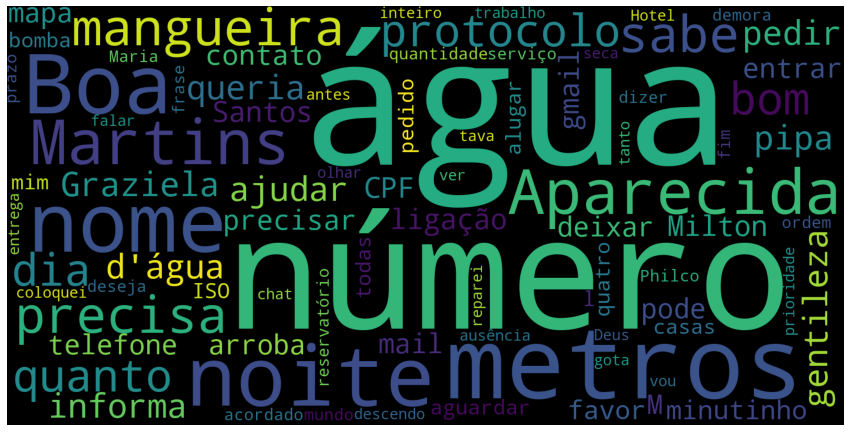

In [38]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["de", "a", "o", "que", "e", "do", "da", "em","um","para","é","com","não","uma","os","no","se",
"na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem", "à", "seu", "sua", "ou", "ser", "quando", "muito", "há",
"nos", "já", "está", "eu", "também", "só", "pelo", "pela", "até", "isso", "ela", "entre", "era", "depois", "sem", "mesmo",
"aos", "ter", "seus", "quem", "nas", "me", "esse", "eles", "estão", "você", "tinha", "foram", "essa", "num",
"nem", "suas", "meu", "às", "minha", "têm", "numa", "pelos", "elas", "havia", "seja", "qual", "será", "nós",
"tenho", "lhe", "deles", "essas", "esses", "pelas", "este", "fosse", "dele", "tu", "te", "vocês", "vos", "lhes", "meus",
"minhas", "teu", "tua", "teus", "tuas", "nosso", "nossa", "nossos", "nossas", "dela", "delas", "esta", "estes", "estas",
"aquele", "aquela", "aqueles", "aquelas", "isto", "aquilo", "estou", "está", "estamos", "estão", "estive",
"esteve", "estivemos", "estiveram", "estava", "estávamos", "estavam", "estivera", "estivéramos", "esteja",
"estejamos", "estejam", "estivesse", "estivéssemos", "estivessem", "estiver", "estivermos", "estiverem",
"hei", "há", "havemos", "hão", "houve", "houvemos", "houveram", "houvera", "houvéramos", "haja",
"hajamos", "hajam", "houvesse", "houvéssemos", "houvessem", "houver", "houvermos", "houverem", "houverei", "houverá",
"houveremos", "houverão", "houveria", "houveríamos", "houveriam", "sou", "somos", "são", "era", "éramos",
"eram", "fui", "foi", "fomos", "foram", "fora", "fôramos", "seja", "sejamos", "sejam", "fosse", "fôssemos",
"fossem", "for", "formos", "forem", "serei", "será", "seremos", "serão", "seria", "seríamos", "seriam", "tenho",
"tem", "temos", "tém", "tinha", "tínhamos", "tinham", "tive", "teve", "tivemos", "tiveram", "tivera", "tivéramos",
"tenha", "tenhamos", "tenham", "tivesse", "tivéssemos", "tivessem", "tiver", "tivermos", "tiverem", "terei",
"terá", "teremos", "terão", "teria", "teríamos", "teriam", "tá", "obrigada", "senhora", "aí", "então", "sim", "não", "agora", 
"posso", "senhoras"
])
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(texto)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(15,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);
wordcloud.to_file("wordcloud.png")

In [37]:
wordstring = texto

wordlist = wordstring.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

print("String\n" + wordstring +"\n")
print("Lista\n" + str(wordlist) + "\n")
print("Frequências\n" + str(wordfreq) + "\n")
print("Pares\n" + str(list(zip(wordlist, wordfreq))))

String
 Boa noite meu nome é Graziela em que posso ajudar Boa noite eu queria pedir uma pipa d'água senhora me informa por gentileza o número da ligação da água o CPF Agora sim é o número 0085 057 Milton dos Santos e se precisar entrar em contato telefone é 99722636 isso é o meu obrigada pode deixar um e-mail mapa M Aparecida Martins 10 arroba gmail.com obrigada a senhora só um minutinho tá por favor obrigada por aguardar as senhoras pedido foi 10.000 l de água 10 metros de mangueira e não precisa de bomba em da ISO Então mas esse aí não foi para mim não é que tem são quatro casas mas todas elas são o mesmo do mesmo que alugar Então qual a quantidade de água que a senhora precisa Philco até o reservatório da senhora a senhora sabe dizer quantos metros de mangueira de 15 metros eu não tá a fim do mundo qual o nome da senhora Maria Aparecida Martins muito obrigada por ter me acordado tá a senhora deseja número da ordem de serviço ou protocolo demora muito a frase tem um prazo de até 3 di